# Plane Crash Info

This exercise is trying to make some more sense out of the data collected at http://PlaneCrashInfo.com, which contains way too few charts for this topic. Using this notebook you can explore the data and add your own charts.

**N.B.** This is work in progress… If you have any suggestion, please feel free to raise an issue or provide a pull request in the [repo on GitHub](https://github.com/deeplook/notebooks/tree/master/planecrashinfo/)!

In [1]:
import pandas as pd
import re
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from mpl_toolkits.basemap import Basemap
import planecrashinfo_light as pci

%matplotlib inline

## Raw Data

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Date:,Time:,Location:,Operator:,Flight #:,Route:,AC Type:,Registration:,cn / ln:,Aboard:,Fatalities:,Ground:,Summary:
0,0,ACCIDENT DETAILS,"February 03, 1921",?,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,130,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,?
1,1,ACCIDENT DETAILS,"February 09, 1921",?,"La Crosse, Wisconsin",US Aerial Mail Service,?,?,Junkers F-13,301,?,3 (passengers:2 crew:1),3 (passengers:2 crew:1),0,?
2,2,ACCIDENT DETAILS,"February 15, 1921",?,Off Gibraltar,Aeropostale,?,?,Breguet 14,F-ALBA,?,2 (passengers:? crew:?),2 (passengers:? crew:?),0,?
3,3,ACCIDENT DETAILS,"February 22, 1921",?,"Elko, Nevada",US Aerial Mail Service,?,?,De Havilland DH-4,67,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,?
4,4,ACCIDENT DETAILS,"April 06, 1921",?,"Point Cook, Australia",Military - Royal Australian Air Force,?,?,Avro 504,H3021,?,2 (passengers:? crew:?),1 (passengers:? crew:?),0,?


## Clean(er) Data

In [4]:
df = pci.clean_database(df)

In [5]:
df.head()

,Time,Location,Operator,Route,AC_Type,Aboard,Fatalities,Ground,Summary,Origin,Destination,Fatalities_total,Location_Country
Date,,,,,,,,,,,,,
1921-02-03,NaN,"Mendotta, Minnisota",US Aerial Mail Service,NaN,De Havilland DH-4,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,NaN,NaN,NaN,1.0,USA
1921-02-09,NaN,"La Crosse, Wisconsin",US Aerial Mail Service,NaN,Junkers F-13,3 (passengers:2 crew:1),3 (passengers:2 crew:1),0.0,NaN,NaN,NaN,3.0,USA
1921-02-15,NaN,Off Gibraltar,Aeropostale,NaN,Breguet 14,2 (passengers:? crew:?),2 (passengers:? crew:?),0.0,NaN,NaN,NaN,2.0,Gibraltar
1921-02-22,NaN,"Elko, Nevada",US Aerial Mail Service,NaN,De Havilland DH-4,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,NaN,NaN,NaN,1.0,USA
1921-04-06,NaN,"Point Cook, Australia",Military - Royal Australian Air Force,NaN,Avro 504,2 (passengers:? crew:?),1 (passengers:? crew:?),0.0,NaN,NaN,NaN,1.0,Australia


## Numbers

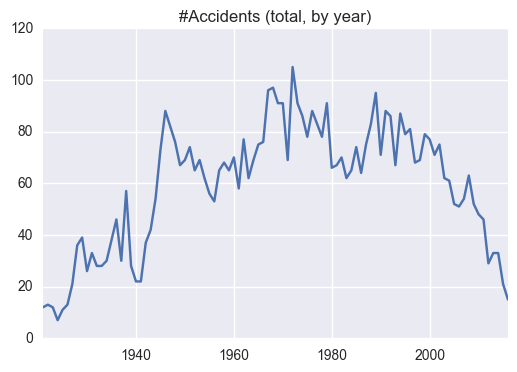

In [6]:
s = df.groupby(df.index.year).size()
s.plot(title='#Accidents (total, by year)')

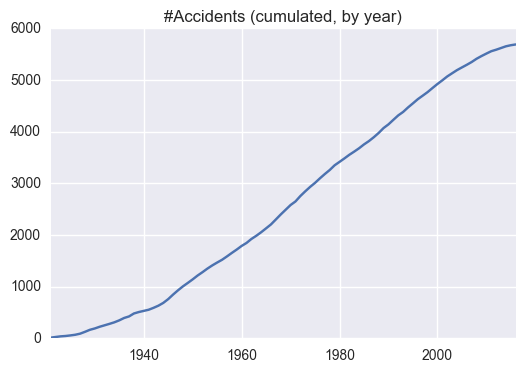

In [7]:
s = df.groupby(df.index.year).size().cumsum()
s.plot(title='#Accidents (cumulated, by year)')

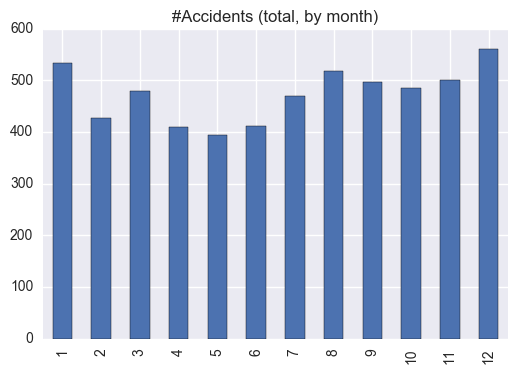

In [8]:
s = df.groupby(df.index.month).size()
s.plot.bar(title='#Accidents (total, by month)')

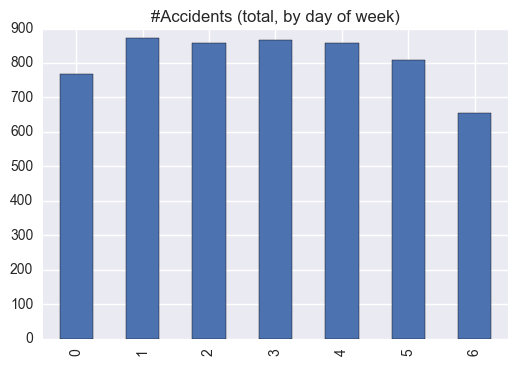

In [9]:
s = df.groupby(df.index.weekday).size()
s.plot.bar(title='#Accidents (total, by day of week)')

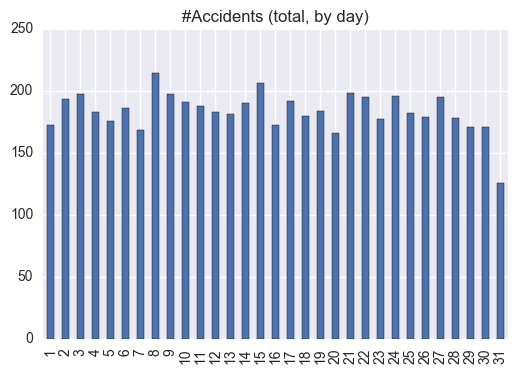

In [10]:
s = df.groupby(df.index.day).size()
s.plot.bar(title='#Accidents (total, by day)')

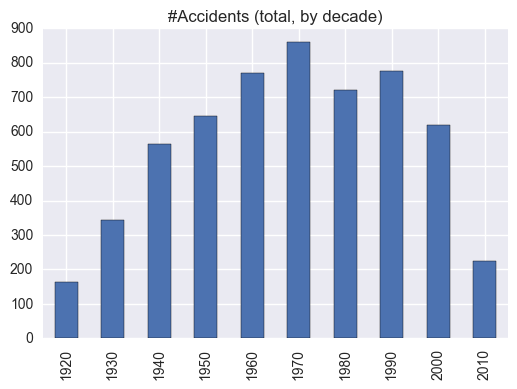

In [11]:
s = df.groupby((df.index.year // 10) * 10).size()
s.plot.bar(title='#Accidents (total, by decade)')

([<matplotlib.axis.XTick at 0x1157fecc0>,
 <a list of 4 Text xticklabel objects>)

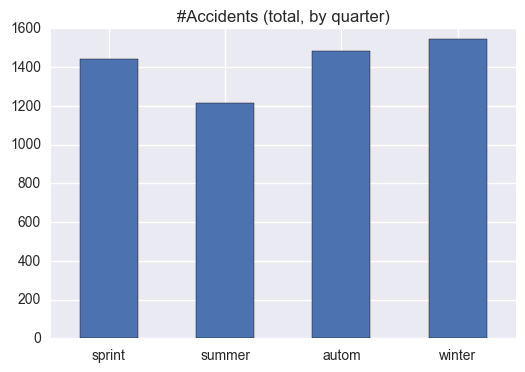

In [34]:
s = df.groupby((df.index.quarter)).size()
s.plot.bar(title='#Accidents (total, by quarter)')
plt.xticks([0, 1, 2, 3], ['sprint', 'summer', 'autom', 'winter'], rotation='horizontal')

## Fatalities

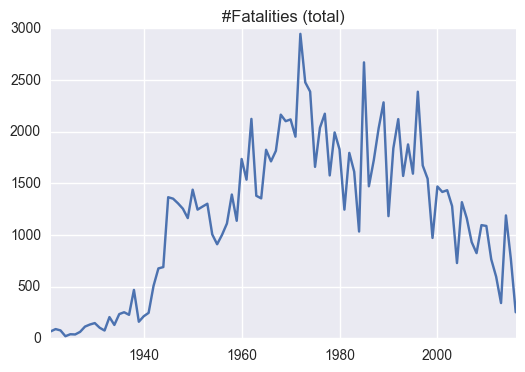

In [37]:
df.Fatalities_total.groupby(df.index.year).sum().plot(title='#Fatalities (total)')

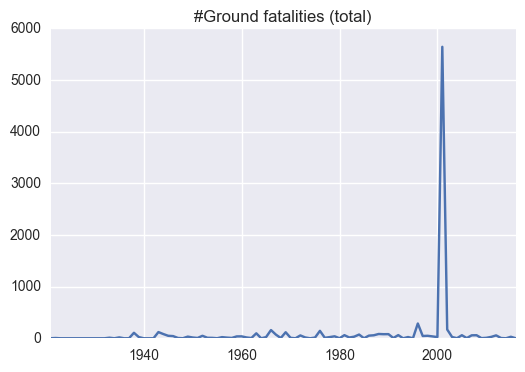

In [38]:
df.Ground.groupby(df.index.year).sum().plot(title='#Ground fatalities (total)')

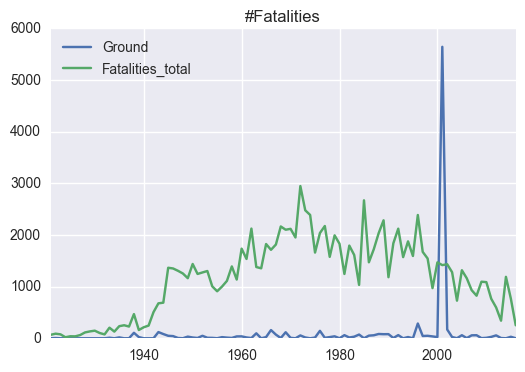

In [39]:
df.groupby(df.index.year).sum().plot(title='#Fatalities')

## Aircraft

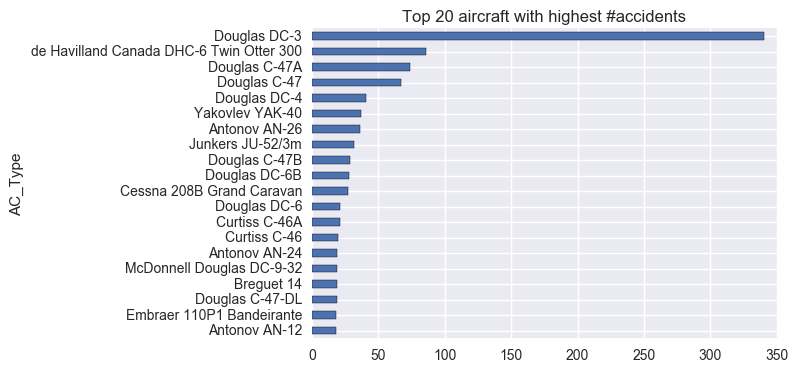

In [40]:
s = df.groupby('AC_Type').size().sort_values(ascending=True)[-20:]
s.plot.barh(title='Top 20 aircraft with highest #accidents')

https://en.wikipedia.org/wiki/Douglas_DC-3

In [42]:
plane_brands = df.AC_Type.unique()

def get_plane_brand(brands, brand_name):
    return [op for op in brands if type(op) == str and op.startswith(brand_name)]

doug = get_plane_brand(plane_brands, 'Douglas')
anto = get_plane_brand(plane_brands, 'Antonov')
airb = get_plane_brand(plane_brands, 'Airbus')
boei = get_plane_brand(plane_brands, 'Boeing')

In [44]:
print('A number of the Boeing models %s' % len(boei))
print('A number of the Douglas models %s' % len(doug))
print('A number of the Antonov models %s' % len(anto))
print('A number of the Airbus models %s' % len(airb))

A number of the Boeing models 295
A number of the Douglas models 213
A number of the Antonov models 87
A number of the Airbus models 37


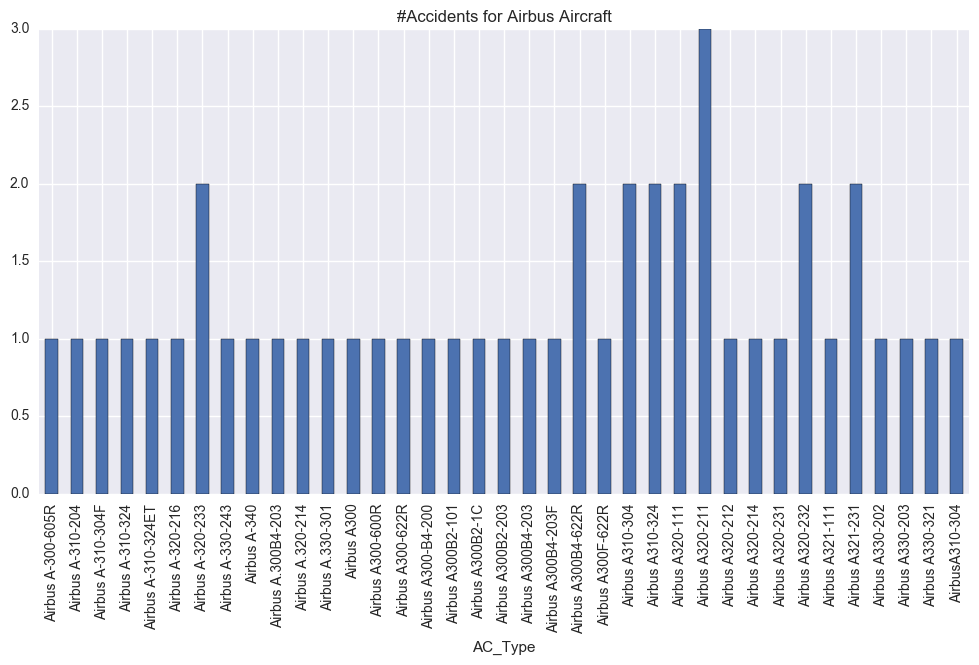

In [45]:
s = df[df.AC_Type.isin(airb)].groupby('AC_Type').size()
s.plot.bar(title='#Accidents for Airbus Aircraft', figsize=(12, 6))

In [46]:
def extract_airbus_type(ac_type):
    "Extract main Airbus type from 'AC Type', e.g. 'A300' from 'Airbus A-300-605R'."

    if type(ac_type) != str:
        return ''
    
    pat = 'Airbus ?(A[\.\-]?\d{3,3})'
    m = re.search(pat, ac_type)
    
    return m.groups()[0].replace('-', '').replace('.', '') if m else ''

In [47]:
airbus_models = set([extract_airbus_type(a) for a in airb])
print(airbus_models)

{'A330', 'A340', 'A300', 'A321', 'A310', 'A320'}


In [48]:
df['Airbus_Model'] = df.AC_Type.apply(extract_airbus_type)

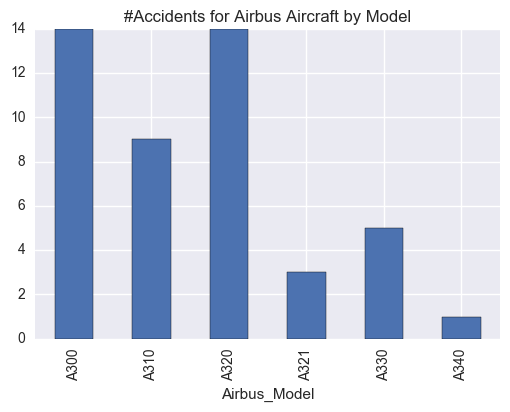

In [49]:
s = df[df.Airbus_Model.isin(airbus_models)].groupby('Airbus_Model').size()
s.plot.bar(title='#Accidents for Airbus Aircraft by Model')

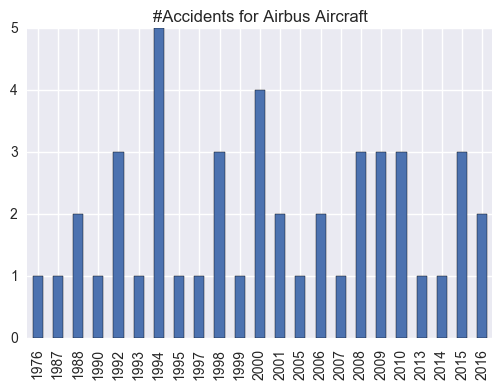

In [50]:
df2 = df[df.AC_Type.isin(airb)]
s2 = df2.groupby(df2.index.year).size()
s2.plot.bar(title='#Accidents for Airbus Aircraft')

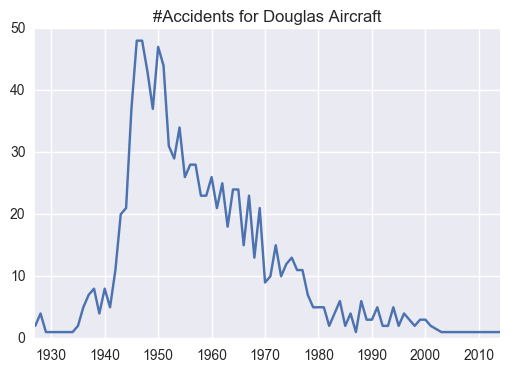

In [51]:
df1 = df[df.AC_Type.isin(doug)]
s1 = df1.groupby(df1.index.year).size()
s1.plot(title='#Accidents for Douglas Aircraft')

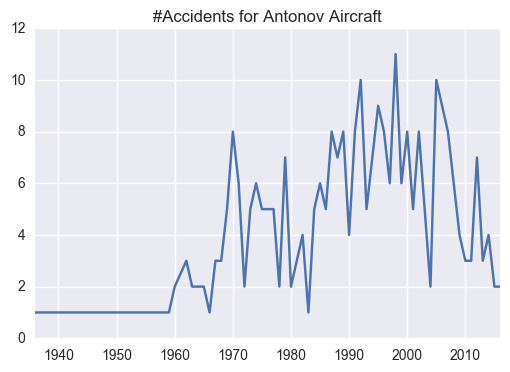

In [52]:
df3 = df[df.AC_Type.isin(anto)]
s3 = df3.groupby(df3.index.year).size()
s3.plot.line(title='#Accidents for Antonov Aircraft')

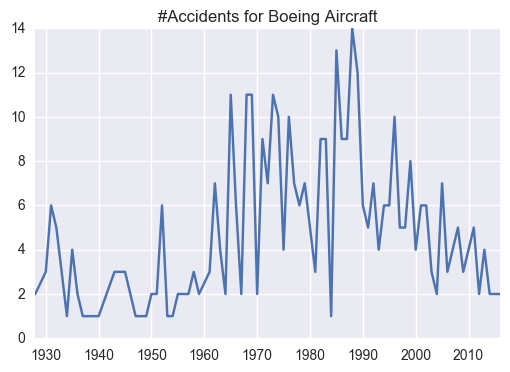

In [53]:
df4 = df[df.AC_Type.isin(boei)]
s4 = df4.groupby(df4.index.year).size()
s4.plot(title='#Accidents for Boeing Aircraft')

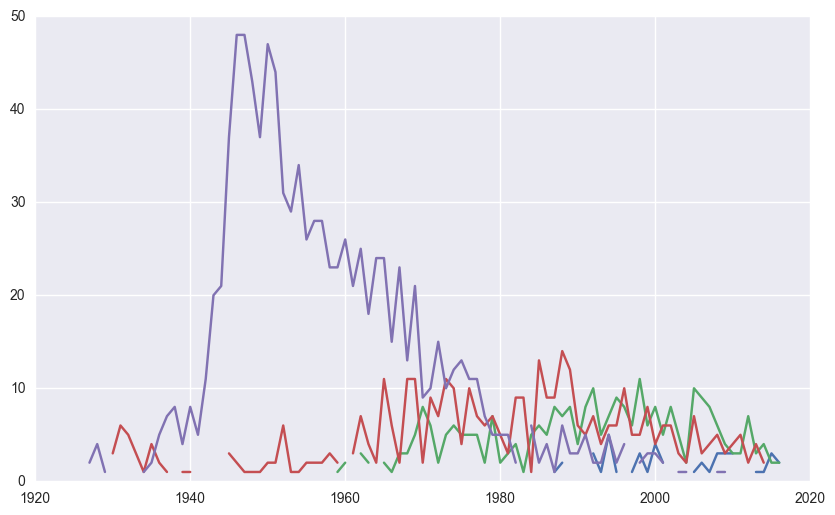

In [54]:
dfab = pd.DataFrame(data={'Douglas': s1, 'Airbus': s2, 'Antonov': s3, 'Boeing': s4})
plt.figure(figsize=(10, 6))
plt.plot(dfab)
plt.show()

## Operators

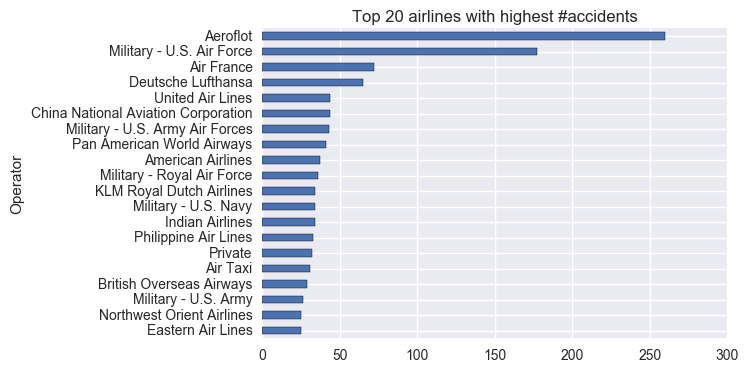

In [56]:
s = df.groupby('Operator').size().sort_values(ascending=True)[-20:]
s.plot.barh(title='Top 20 airlines with highest #accidents')

In [57]:
mil_ops = sorted([op for op in df.Operator.unique() if type(op) == str and 'Military' in op])

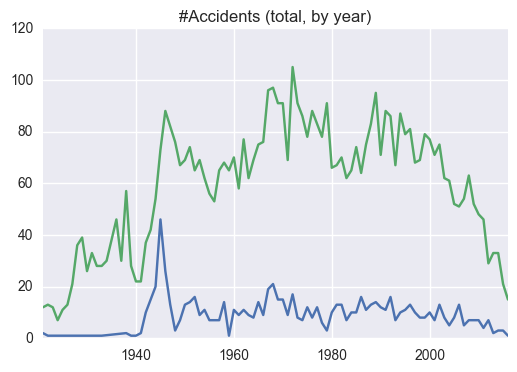

In [60]:
df4 = df[df.Operator.isin(mil_ops)]
s4 = df4.groupby(df4.index.year).size()
s4.plot.line(title='#Accidents for Military Operators (total, by year)')

s = df.groupby(df.index.year).size()
s.plot.line(title='#Accidents (total, by year)')

## Routes

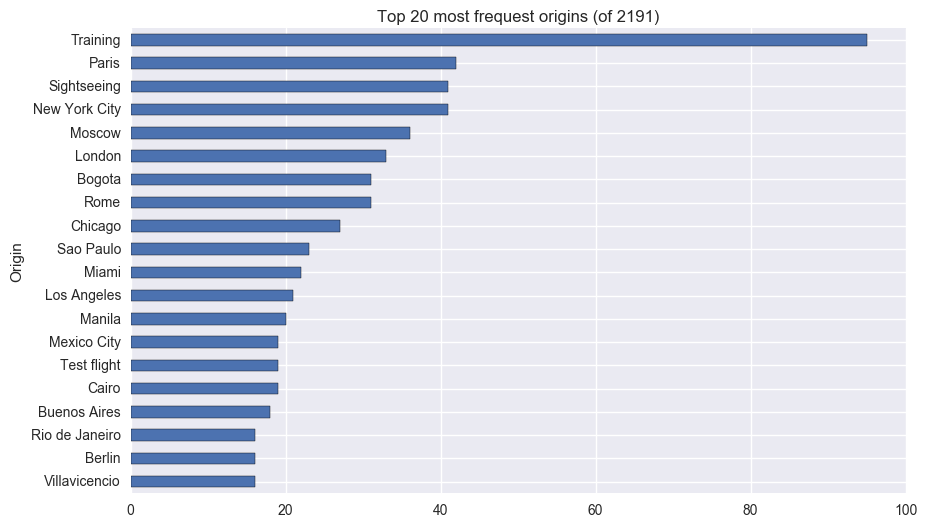

In [61]:
s = df.groupby('Origin').size().sort_values(ascending=True)
s[-20:].plot.barh(title='Top 20 most frequest origins (of %d)' % len(s), figsize=(10, 6))

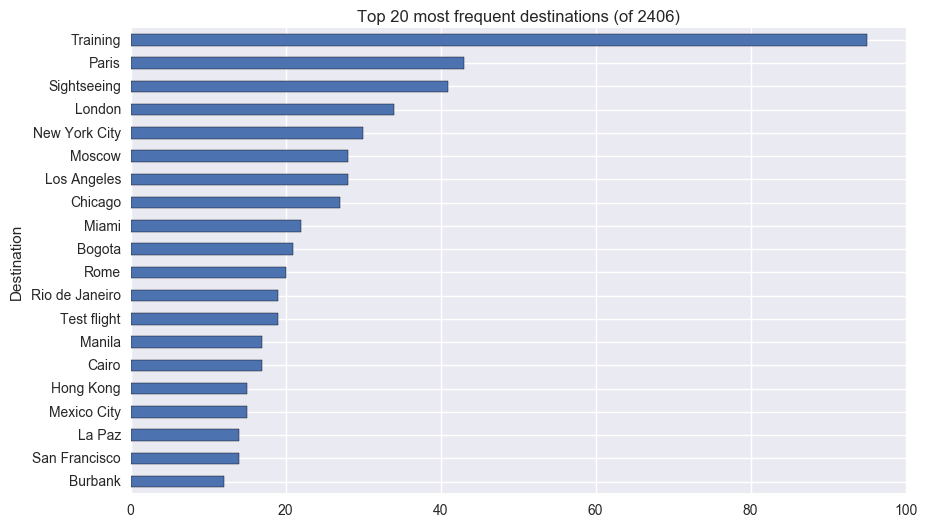

In [62]:
s = df.groupby('Destination').size().sort_values(ascending=True)
s[-20:].plot.barh(title='Top 20 most frequent destinations (of %d)' % len(s), figsize=(10, 6))

## Locations

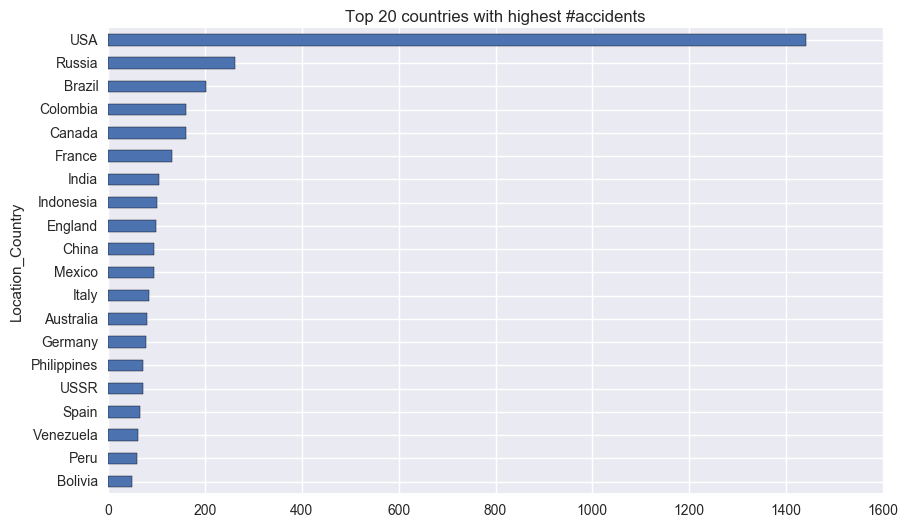

In [63]:
s = df.groupby('Location_Country').size().sort_values(ascending=True)[-20:]
s.plot.barh(title='Top 20 countries with highest #accidents', figsize=(10, 6))

For respective maps see below...

## Maps of Crash Locations

Without more data cleaning (removing prefixes like 'Near...' or 'Off...', etc.) we can plot ca. 53% of all crash locations below.

In [64]:
def show_map(positions, title='', proj='mill', lat_0=0, lon_0=0):
    "Show a world map."
    
    plt.figure(num=1, figsize=(20,10))
    plt.title(title)

    map = Basemap(projection=proj, lat_0=lat_0, lon_0=lon_0, resolution='c')
    map.drawcoastlines()
    map.drawcountries()
    map.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0])
    map.drawmeridians(np.arange(map.lonmin, map.lonmax + 30, 60), labels=[0, 0, 0, 1])
    map.drawmapboundary(fill_color='#aaddff')
    map.fillcontinents(color='#dddddd', lake_color='#aaddff')

    for pos in positions:
        lon, lat = pos['lon'], pos['lat']
        map.plot(lon, lat, 'ro', markersize=3, latlon=True)

    plt.show()

In [65]:
locs = json.load(open('data/geolocs.json'))
positions = list(filter(None, locs.values()))
print('#locations found: %d' % len(locs))
print('#coordinates found: %d' % len(positions))

#locations found: 3738
#coordinates found: 3225


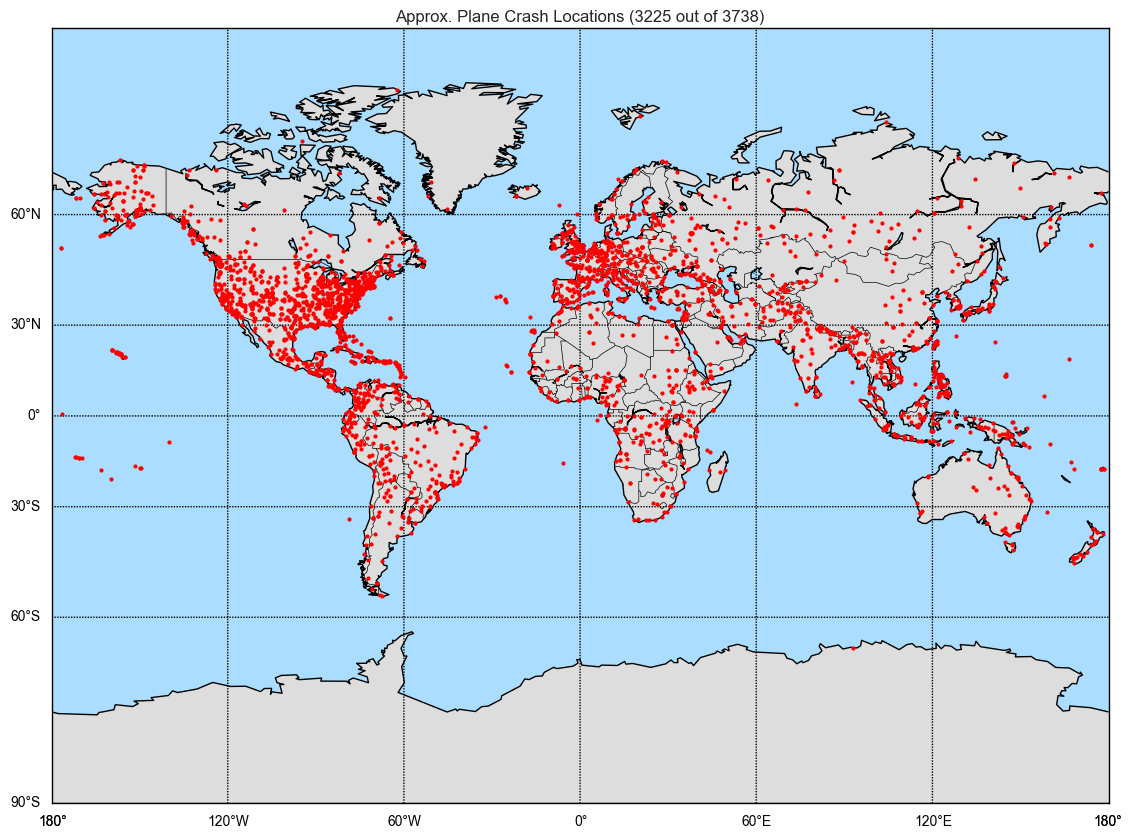

In [66]:
title = 'Approx. Plane Crash Locations (%d out of %d)'% (len(positions), len(locs))
show_map(positions, title=title, proj='mill')

                Geostationary, Orthographic or Azimuthal equidistant basemap
                

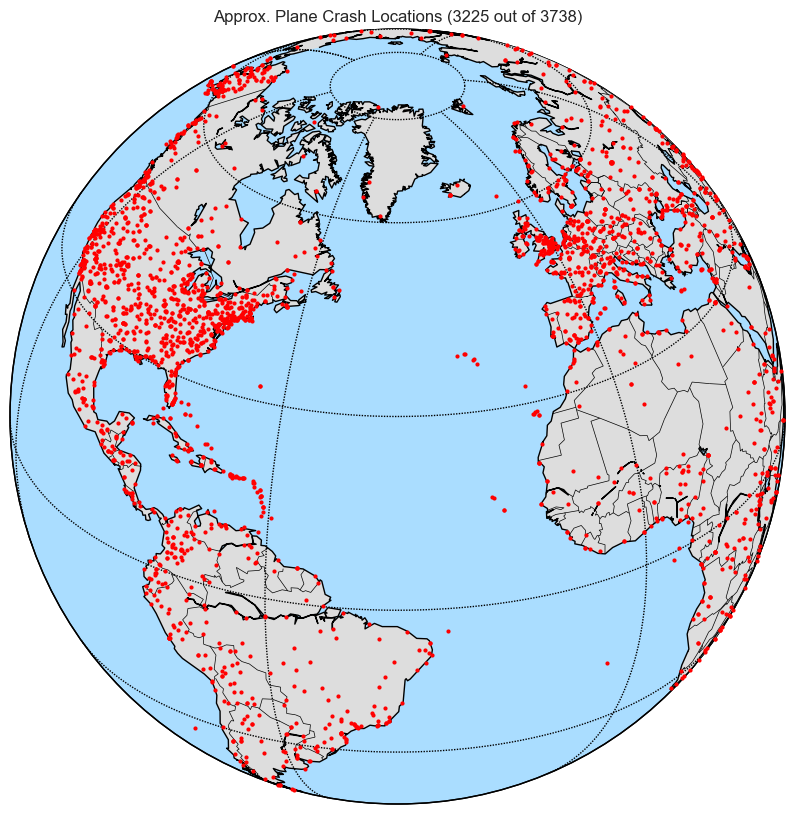

In [67]:
title = 'Approx. Plane Crash Locations (%d out of %d)'% (len(positions), len(locs))
show_map(positions, title=title, proj='ortho', lat_0=30, lon_0=-40)